# NetCDF and xarray

In [1]:
import os
import urllib
import pandas as pd
import numpy as np

import xarray as xr

In [2]:
temp_data = np.array([np.zeros((5,5)),
                      np.ones((5,5)),
                      np.ones((5,5))*2]).astype(int)
temp_data



array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])

In [3]:
dims = ('time', 'lat', 'lon')

coords = {'time' : pd.date_range("2022-09-01", "2022-09-03"),
          'lat' : np.arange(70, 20, -10),
          'lon' : np.arange(60, 110, 10)}

In [4]:
attrs = {'title' : 'example temperature data',
         'standard_name' : 'air_temperature',
         'units' : 'degree_c'}

In [5]:
# create the DataArray

temp = xr.DataArray(data = temp_data,
                    dims = dims,
                    coords = coords,
                    attrs = attrs)

temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c

In [6]:
temp.attrs['description'] = 'simple example of xarray'

temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [7]:
temp.time

<xarray.DataArray 'time' (time: 3)> Size: 24B
array(['2022-09-01T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-03T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03

In [8]:
temp.time.attrs = {'description' : 'daily temperature measurements'}

temp.lat.attrs = {'units' : 'degree_N'}

temp.lat.attrs['standard_name']= 'grid_latitude'
temp.lat.attrs['units'] = 'degree_N'

temp.lon.attrs['standard_name']= 'grid_longitude'
temp.lon.attrs['units'] = 'degree_E'
temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [9]:
temp[:,1,2]

<xarray.DataArray (time: 3)> Size: 24B
array([0, 1, 2])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
    lat      int64 8B 60
    lon      int64 8B 80
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [10]:
temp[0,1,2]

<xarray.DataArray ()> Size: 8B
array(0)
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 60
    lon      int64 8B 80
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [11]:
temp.sel(time = "2022-09-01", lat = 60, lon = 80)

<xarray.DataArray ()> Size: 8B
array(0)
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 60
    lon      int64 8B 80
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [12]:
temp.sel(time = "2022-09-01", lat = 44, lon = 80)

KeyError: "not all values found in index 'lat'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
temp.sel(time = "2022-09-01", lat = 44, lon = 80, method = "nearest")

<xarray.DataArray ()> Size: 8B
array(0)
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 40
    lon      int64 8B 80
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [ ]:

temp.sel(time = "2022-09-01", lat = 44, lon = 80, method = "nearest").data

array(0)

In [ ]:
temp.sel(time = "2022-09-01", lat = 60, lon = np.arange(70,90, 10))

# np.arange(70,90, 10)


<xarray.DataArray (lon: 2)> Size: 16B
array([0, 0])
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 60
  * lon      (lon) int64 16B 70 80
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [ ]:
temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          example temperature data
    standard_name:  air_temperature
    units:          degree_c
    description:    simple example of xarray

In [ ]:
avg_temp = temp.mean(dim = 'time')

avg_temp.attrs['title'] = 'average temperature over 3 days'

avg_temp

<xarray.DataArray (lat: 5, lon: 5)> Size: 200B
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
Coordinates:
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:    average temperature over 3 days

# Make an xarray.DataSet


In [ ]:
data_vars = {'avg_temp' : avg_temp,
             'temp' : temp }

attrs = {'title' : 'averaged and daily temperature data at weather stations',
         'description' : 'example xarray.DataSet'}

temp_dataset = xr.Dataset(data_vars = data_vars,
                          attrs = attrs)

In [ ]:
temp_dataset

<xarray.Dataset> Size: 904B
Dimensions:   (lat: 5, lon: 5, time: 3)
Coordinates:
  * lat       (lat) int64 40B 70 60 50 40 30
  * lon       (lon) int64 40B 60 70 80 90 100
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
Data variables:
    avg_temp  (lat, lon) float64 200B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    temp      (time, lat, lon) int64 600B 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2
Attributes:
    title:        averaged and daily temperature data at weather stations
    description:  example xarray.DataSet

In [ ]:
fp = os.path.join(os.getcwd(), 'temp_dataset.nc')

temp_dataset.to_netcdf(fp)

In [ ]:
check = xr.open_dataset(fp)
check

<xarray.Dataset> Size: 904B
Dimensions:   (lat: 5, lon: 5, time: 3)
Coordinates:
  * lat       (lat) int64 40B 70 60 50 40 30
  * lon       (lon) int64 40B 60 70 80 90 100
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
Data variables:
    avg_temp  (lat, lon) float64 200B ...
    temp      (time, lat, lon) int64 600B ...
Attributes:
    title:        averaged and daily temperature data at weather stations
    description:  example xarray.DataSet

In [ ]:
type(fp)

str

# Work with a real NetCDF file from the ADC


In [ ]:
url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A792bfc37-416e-409e-80b1-fdef8ab60033'

msg = urllib.request.urlretrieve(url, "FW_data_CESM_LW_2006_2100.nc")

In [13]:
fp = os.path.join(os.getcwd(),'FW_data_CESM_LW_2006_2100.nc')
fw_data = xr.open_dataset(fp)
fw_data

<xarray.Dataset> Size: 135kB
Dimensions:                          (time: 95, member: 11)
Coordinates:
  * time                             (time) float64 760B 2.006e+03 ... 2.1e+03
  * member                           (member) float64 88B 1.0 2.0 ... 10.0 11.0
Data variables: (12/16)
    FW_flux_Fram_annual_net          (time, member) float64 8kB ...
    FW_flux_Barrow_annual_net        (time, member) float64 8kB ...
    FW_flux_Nares_annual_net         (time, member) float64 8kB ...
    FW_flux_Davis_annual_net         (time, member) float64 8kB ...
    FW_flux_BSO_annual_net           (time, member) float64 8kB ...
    FW_flux_Bering_annual_net        (time, member) float64 8kB ...
    ...                               ...
    Solid_FW_flux_BSO_annual_net     (time, member) float64 8kB ...
    Solid_FW_flux_Bering_annual_net  (time, member) float64 8kB ...
    runoff_annual                    (time, member) float64 8kB ...
    netPrec_annual                   (time, member) float64 8kB ...
    Liquid_FW_storage_Arctic_annual  (time, member) float64 8kB ...
    Solid_FW_storage_Arctic_annual   (time, member) float64 8kB ...
Attributes:
    creation_date:   02-Jun-2020 15:38:31
    author:          Alexandra Jahn, CU Boulder, alexandra.jahn@colorado.edu
    title:           Annual timeseries of freshwater data from the CESM Low W...
    description:     Annual mean Freshwater (FW) fluxes and storage relative ...
    data_structure:  The data structure is |Ensemble member | Time (in years)...

In [19]:
member2 = fw_data.netPrec_annual.sel(member = 2)

member2

<xarray.DataArray 'netPrec_annual' (time: 95)> Size: 760B
[95 values with dtype=float64]
Coordinates:
  * time     (time) float64 760B 2.006e+03 2.007e+03 ... 2.099e+03 2.1e+03
    member   float64 8B 2.0
Attributes:
    units:      km3/yr
    long_name:  Net FW flux from precipitation minus evaporation over the Arc...

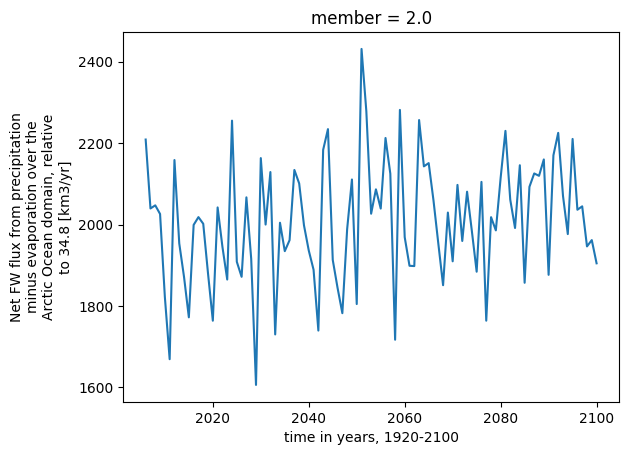

In [20]:
member2.plot()

In [35]:
# max value of the 2nd member of the netPrec_annual between 2022 to 2100
print( member2.max() )
print( member2.sel(time = pd.date_range('2022', '2100'), method='nearest').max() )


# note that time is a float!!  so pd.date_range is no good.
member2.sel(time = pd.date_range('2022', '2100', freq='YE'), method='nearest').max()
member2.sel(time = np.arange(2022, 2100)).max()

member2.loc[2022:2100]


<xarray.DataArray 'netPrec_annual' ()> Size: 8B
array(2431.10032351)
Coordinates:
    member   float64 8B 2.0
<xarray.DataArray 'netPrec_annual' ()> Size: 8B
array(1904.76555922)
Coordinates:
    member   float64 8B 2.0


<xarray.DataArray 'netPrec_annual' (time: 79)> Size: 632B
array([1945.355813, 1864.957608, 2255.011079, 1908.527127, 1871.596426,
       2066.698113, 1915.627194, 1606.202663, 2163.072721, 1999.894225,
       2128.807793, 1730.157807, 2004.363711, 1934.619578, 1961.641825,
       2133.984507, 2100.872032, 1998.152868, 1936.160188, 1888.979096,
       1739.643399, 2183.405479, 2234.175433, 1913.12681 , 1844.599277,
       1782.303602, 1988.65111 , 2110.562963, 1804.745419, 2431.100324,
       2278.126158, 2026.546473, 2086.390118, 2039.196003, 2212.42824 ,
       2124.793176, 1717.164921, 2281.361115, 1968.934899, 1898.694923,
       1897.966857, 2256.511726, 2142.77437 , 2150.77564 , 2059.183773,
       1954.013644, 1851.009509, 2029.365686, 1909.682408, 2097.263358,
       1959.62086 , 2080.566397, 1983.871736, 1884.143938, 2104.651123,
       1763.933545, 2018.07668 , 1985.591128, 2114.668759, 2229.904322,
       2061.211734, 1991.483719, 2145.538448, 1856.963699, 2092.508225,
       2125.400212, 2119.526455, 2159.713051, 1876.473441, 2169.930131,
       2224.98958 , 2070.136476, 1976.527478, 2210.090693, 2036.273118,
       2044.633842, 1946.276296, 1961.74668 , 1904.765559])
Coordinates:
  * time     (time) float64 632B 2.022e+03 2.023e+03 ... 2.099e+03 2.1e+03
    member   float64 8B 2.0
Attributes:
    units:      km3/yr
    long_name:  Net FW flux from precipitation minus evaporation over the Arc...

In [37]:
member2.loc[2022:2100].max()


<xarray.DataArray 'netPrec_annual' ()> Size: 8B
array(2431.10032351)
Coordinates:
    member   float64 8B 2.0

In [30]:
pd.date_range('2022', '2100', freq='YE')

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
               '2074-12-31', '2075-12-31', '2076-12-31', '2077-12-31',
      

In [38]:
url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A792bfc37-416e-409e-80b1-fdef8ab60033'

msg = urllib.request.urlretrieve("https://n5eil01u.ecs.nsidc.org/ICEBRIDGE/IDBMG4.005/1993.01.01/BedMachineGreenland-v5.nc")

HTTPError: HTTP Error 401: Unauthorized